# CNN para la deteccion de unidades de insulina

La siguiente Actividad se llevó a cabo tomando como ejemplo el siguiente articulo: https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/. Se realizaron las adecuaciones necesarias para adaptar el modelo a las necesidades de la actividad.

Se creo un dataset con imágenes de una pluma de inyección de insulina, las cuales muestran la cantidad de unidades de insulina a inyectar. Para mayor simplicidad del dataset solo se tuvieron en cuenta las unidades del 1 al 10. Se tomaron 55 fotografías de cada unidad (1-10) utilizando la librería opencv.

El modelo fue entrenado con dichas imágenes para posteriormente poder realizar la detección de unidades inyectadas con solo reconocer el numero en la imagen.


# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

# Cargar set de Imágenes

In [3]:
dirname = os.path.join(os.getcwd(), 'pictures')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []


print("leyendo imagenes de ",imgpath)

for folder in os.listdir(imgpath):
    folderPath = os.path.join(imgpath, folder)
    directories.append(folder)
    print(f"Folder: {folder}")
    cant=0
    for filename in os.listdir(folderPath):
        print(f"Reading File: {filename}")
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(folderPath, filename)
            image = plt.imread(filepath)
            images.append(image)
    dircount.append(cant)

    
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))    



leyendo imagenes de  C:\Users\Ruben\OneDrive\Documents\Master\tecm-ai-master\Aprendizaje_Profundo\Evidencia_3\pictures\
Folder: 1
Reading File: picture_1_1.jpg
Reading File: picture_1_10.jpg
Reading File: picture_1_11.jpg
Reading File: picture_1_12.jpg
Reading File: picture_1_13.jpg
Reading File: picture_1_14.jpg
Reading File: picture_1_15.jpg
Reading File: picture_1_16.jpg
Reading File: picture_1_17.jpg
Reading File: picture_1_18.jpg
Reading File: picture_1_19.jpg
Reading File: picture_1_2.jpg
Reading File: picture_1_20.jpg
Reading File: picture_1_21.jpg
Reading File: picture_1_22.jpg
Reading File: picture_1_23.jpg
Reading File: picture_1_24.jpg
Reading File: picture_1_25.jpg
Reading File: picture_1_26.jpg
Reading File: picture_1_27.jpg
Reading File: picture_1_28.jpg
Reading File: picture_1_29.jpg
Reading File: picture_1_3.jpg
Reading File: picture_1_30.jpg
Reading File: picture_1_31.jpg
Reading File: picture_1_32.jpg
Reading File: picture_1_33.jpg
Reading File: picture_1_34.jpg
Readi

Reading File: picture_5_24.jpg
Reading File: picture_5_25.jpg
Reading File: picture_5_26.jpg
Reading File: picture_5_27.jpg
Reading File: picture_5_28.jpg
Reading File: picture_5_29.jpg
Reading File: picture_5_3.jpg
Reading File: picture_5_30.jpg
Reading File: picture_5_31.jpg
Reading File: picture_5_32.jpg
Reading File: picture_5_33.jpg
Reading File: picture_5_34.jpg
Reading File: picture_5_35.jpg
Reading File: picture_5_36.jpg
Reading File: picture_5_37.jpg
Reading File: picture_5_38.jpg
Reading File: picture_5_39.jpg
Reading File: picture_5_4.jpg
Reading File: picture_5_40.jpg
Reading File: picture_5_41.jpg
Reading File: picture_5_42.jpg
Reading File: picture_5_43.jpg
Reading File: picture_5_44.jpg
Reading File: picture_5_45.jpg
Reading File: picture_5_46.jpg
Reading File: picture_5_47.jpg
Reading File: picture_5_48.jpg
Reading File: picture_5_49.jpg
Reading File: picture_5_5.jpg
Reading File: picture_5_50.jpg
Reading File: picture_5_51.jpg
Reading File: picture_5_52.jpg
Reading Fil

# Creamos las etiquetas

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  550


In [5]:
insulin_units_labels=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    insulin_units_labels.append(name[len(name)-1])
    indice=indice+1

0 1
1 10
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


# Creamos Sets de Entrenamiento y Test

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (440, 21, 28, 3) (440,)
Testing data shape :  (110, 21, 28, 3) (110,)


Text(0.5, 1.0, 'Ground Truth : 3')

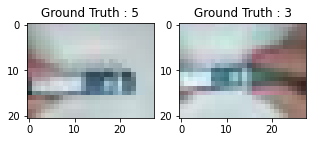

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(352, 21, 28, 3) (88, 21, 28, 3) (352, 10) (88, 10)


# Creamos el modelo de CNN

In [13]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 500 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [14]:
insulin_units_model = Sequential()
insulin_units_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
insulin_units_model.add(LeakyReLU(alpha=0.1))
insulin_units_model.add(MaxPooling2D((2, 2),padding='same'))
insulin_units_model.add(Dropout(0.5))

insulin_units_model.add(Flatten())
insulin_units_model.add(Dense(32, activation='linear'))
insulin_units_model.add(LeakyReLU(alpha=0.1))
insulin_units_model.add(Dropout(0.5))
insulin_units_model.add(Dense(nClasses, activation='softmax'))

In [15]:
insulin_units_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

In [16]:
insulin_units_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
insulin_units_train = insulin_units_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/500
6/6 [==============================] - 2s 129ms/step - loss: 2.3763 - accuracy: 0.1051 - val_loss: 2.2925 - val_accuracy: 0.0795
Epoch 2/500
6/6 [==============================] - 0s 53ms/step - loss: 2.3659 - accuracy: 0.0824 - val_loss: 2.2869 - val_accuracy: 0.0568
Epoch 3/500
6/6 [==============================] - 0s 40ms/step - loss: 2.3284 - accuracy: 0.0881 - val_loss: 2.2827 - val_accuracy: 0.0568
Epoch 4/500
6/6 [==============================] - 0s 46ms/step - loss: 2.3098 - accuracy: 0.0994 - val_loss: 2.2772 - val_accuracy: 0.0568
Epoch 5/500
6/6 [==============================] - 0s 42ms/step - loss: 2.2916 - accuracy: 0.1250 - val_loss: 2.2748 - val_accuracy: 0.0568
Epoch 6/500
6/6 [==============================] - 0s 62ms/step - loss: 2.3005 - accuracy: 0.1222 - val_loss: 2.2718 - val_accuracy: 0.0568
Epoch 7/500
6/6 [==============================] - 0s 42ms/step - loss: 2.3241 - accuracy: 0.0966 - val_loss: 2.2707 - val_accuracy: 0.0568
Epoch 8/500
6/6 [==

6/6 [==============================] - 0s 38ms/step - loss: 2.1699 - accuracy: 0.1847 - val_loss: 2.1571 - val_accuracy: 0.4773
Epoch 60/500
6/6 [==============================] - 0s 43ms/step - loss: 2.1851 - accuracy: 0.1875 - val_loss: 2.1504 - val_accuracy: 0.5227
Epoch 61/500
6/6 [==============================] - 0s 54ms/step - loss: 2.1704 - accuracy: 0.1903 - val_loss: 2.1472 - val_accuracy: 0.5000
Epoch 62/500
6/6 [==============================] - 0s 21ms/step - loss: 2.2034 - accuracy: 0.1790 - val_loss: 2.1504 - val_accuracy: 0.4659
Epoch 63/500
6/6 [==============================] - 0s 42ms/step - loss: 2.2090 - accuracy: 0.1591 - val_loss: 2.1490 - val_accuracy: 0.4545
Epoch 64/500
6/6 [==============================] - 0s 51ms/step - loss: 2.1594 - accuracy: 0.1733 - val_loss: 2.1484 - val_accuracy: 0.4545
Epoch 65/500
6/6 [==============================] - 0s 36ms/step - loss: 2.1717 - accuracy: 0.2102 - val_loss: 2.1429 - val_accuracy: 0.4432
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 44ms/step - loss: 2.0181 - accuracy: 0.2585 - val_loss: 1.9701 - val_accuracy: 0.3523
Epoch 118/500
6/6 [==============================] - 0s 58ms/step - loss: 2.0474 - accuracy: 0.2102 - val_loss: 1.9651 - val_accuracy: 0.4091
Epoch 119/500
6/6 [==============================] - 0s 54ms/step - loss: 2.0078 - accuracy: 0.2670 - val_loss: 1.9613 - val_accuracy: 0.4091
Epoch 120/500
6/6 [==============================] - 0s 45ms/step - loss: 2.0754 - accuracy: 0.2244 - val_loss: 1.9551 - val_accuracy: 0.3864
Epoch 121/500
6/6 [==============================] - 0s 30ms/step - loss: 2.0073 - accuracy: 0.2898 - val_loss: 1.9530 - val_accuracy: 0.3864
Epoch 122/500
6/6 [==============================] - 0s 31ms/step - loss: 2.0288 - accuracy: 0.2614 - val_loss: 1.9466 - val_accuracy: 0.3977
Epoch 123/500
6/6 [==============================] - 0s 31ms/step - loss: 2.0373 - accuracy: 0.2500 - val_loss: 1.9469 - val_accuracy: 0.3864
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 43ms/step - loss: 1.9122 - accuracy: 0.2812 - val_loss: 1.7877 - val_accuracy: 0.4886
Epoch 176/500
6/6 [==============================] - 0s 42ms/step - loss: 1.8744 - accuracy: 0.2983 - val_loss: 1.7782 - val_accuracy: 0.5000
Epoch 177/500
6/6 [==============================] - 0s 36ms/step - loss: 1.8291 - accuracy: 0.3182 - val_loss: 1.7737 - val_accuracy: 0.5000
Epoch 178/500
6/6 [==============================] - 0s 39ms/step - loss: 1.9203 - accuracy: 0.2955 - val_loss: 1.7730 - val_accuracy: 0.5000
Epoch 179/500
6/6 [==============================] - 0s 52ms/step - loss: 1.8571 - accuracy: 0.3494 - val_loss: 1.7681 - val_accuracy: 0.5114
Epoch 180/500
6/6 [==============================] - 0s 43ms/step - loss: 1.9571 - accuracy: 0.2699 - val_loss: 1.7709 - val_accuracy: 0.5227
Epoch 181/500
6/6 [==============================] - 0s 46ms/step - loss: 1.9051 - accuracy: 0.3097 - val_loss: 1.7701 - val_accuracy: 0.5227
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 35ms/step - loss: 1.7883 - accuracy: 0.3267 - val_loss: 1.6366 - val_accuracy: 0.5909
Epoch 234/500
6/6 [==============================] - 0s 45ms/step - loss: 1.7479 - accuracy: 0.3352 - val_loss: 1.6292 - val_accuracy: 0.6023
Epoch 235/500
6/6 [==============================] - 0s 47ms/step - loss: 1.7501 - accuracy: 0.3665 - val_loss: 1.6231 - val_accuracy: 0.5795
Epoch 236/500
6/6 [==============================] - 0s 47ms/step - loss: 1.7656 - accuracy: 0.3352 - val_loss: 1.6188 - val_accuracy: 0.5455
Epoch 237/500
6/6 [==============================] - 0s 53ms/step - loss: 1.7386 - accuracy: 0.3693 - val_loss: 1.6083 - val_accuracy: 0.5909
Epoch 238/500
6/6 [==============================] - 0s 56ms/step - loss: 1.7386 - accuracy: 0.3608 - val_loss: 1.5957 - val_accuracy: 0.6136
Epoch 239/500
6/6 [==============================] - 0s 43ms/step - loss: 1.7698 - accuracy: 0.3381 - val_loss: 1.5985 - val_accuracy: 0.5682
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 36ms/step - loss: 1.7094 - accuracy: 0.3409 - val_loss: 1.4961 - val_accuracy: 0.6023
Epoch 292/500
6/6 [==============================] - 0s 52ms/step - loss: 1.7182 - accuracy: 0.3693 - val_loss: 1.4951 - val_accuracy: 0.6136
Epoch 293/500
6/6 [==============================] - 0s 43ms/step - loss: 1.7255 - accuracy: 0.3239 - val_loss: 1.4947 - val_accuracy: 0.5909
Epoch 294/500
6/6 [==============================] - 0s 38ms/step - loss: 1.6504 - accuracy: 0.3807 - val_loss: 1.4868 - val_accuracy: 0.6364
Epoch 295/500
6/6 [==============================] - 0s 48ms/step - loss: 1.7195 - accuracy: 0.3523 - val_loss: 1.4898 - val_accuracy: 0.6136
Epoch 296/500
6/6 [==============================] - 0s 53ms/step - loss: 1.6899 - accuracy: 0.4006 - val_loss: 1.4843 - val_accuracy: 0.6364
Epoch 297/500
6/6 [==============================] - 0s 53ms/step - loss: 1.6732 - accuracy: 0.3636 - val_loss: 1.4830 - val_accuracy: 0.6250
Epoch 

Epoch 349/500
6/6 [==============================] - 1s 93ms/step - loss: 1.5755 - accuracy: 0.4062 - val_loss: 1.3845 - val_accuracy: 0.6818
Epoch 350/500
6/6 [==============================] - 0s 69ms/step - loss: 1.5433 - accuracy: 0.4375 - val_loss: 1.3826 - val_accuracy: 0.6705
Epoch 351/500
6/6 [==============================] - 0s 63ms/step - loss: 1.6253 - accuracy: 0.3920 - val_loss: 1.3804 - val_accuracy: 0.7045
Epoch 352/500
6/6 [==============================] - 0s 62ms/step - loss: 1.6213 - accuracy: 0.3920 - val_loss: 1.3792 - val_accuracy: 0.7273
Epoch 353/500
6/6 [==============================] - 0s 53ms/step - loss: 1.4868 - accuracy: 0.4347 - val_loss: 1.3765 - val_accuracy: 0.6818
Epoch 354/500
6/6 [==============================] - 0s 60ms/step - loss: 1.5930 - accuracy: 0.4091 - val_loss: 1.3764 - val_accuracy: 0.6477
Epoch 355/500
6/6 [==============================] - 0s 55ms/step - loss: 1.6128 - accuracy: 0.3778 - val_loss: 1.3761 - val_accuracy: 0.6591
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 42ms/step - loss: 1.5585 - accuracy: 0.4290 - val_loss: 1.2868 - val_accuracy: 0.7614
Epoch 408/500
6/6 [==============================] - 0s 49ms/step - loss: 1.4709 - accuracy: 0.4574 - val_loss: 1.2857 - val_accuracy: 0.7045
Epoch 409/500
6/6 [==============================] - 0s 46ms/step - loss: 1.4927 - accuracy: 0.4545 - val_loss: 1.2861 - val_accuracy: 0.7159
Epoch 410/500
6/6 [==============================] - 0s 63ms/step - loss: 1.5087 - accuracy: 0.4489 - val_loss: 1.2849 - val_accuracy: 0.7273
Epoch 411/500
6/6 [==============================] - 0s 60ms/step - loss: 1.4783 - accuracy: 0.4517 - val_loss: 1.2809 - val_accuracy: 0.7273
Epoch 412/500
6/6 [==============================] - 0s 69ms/step - loss: 1.5071 - accuracy: 0.4119 - val_loss: 1.2766 - val_accuracy: 0.7273
Epoch 413/500
6/6 [==============================] - 0s 54ms/step - loss: 1.4954 - accuracy: 0.4233 - val_loss: 1.2752 - val_accuracy: 0.7273
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 50ms/step - loss: 1.4397 - accuracy: 0.4460 - val_loss: 1.2080 - val_accuracy: 0.7500
Epoch 466/500
6/6 [==============================] - 0s 62ms/step - loss: 1.4363 - accuracy: 0.4574 - val_loss: 1.2075 - val_accuracy: 0.7273
Epoch 467/500
6/6 [==============================] - 0s 43ms/step - loss: 1.4655 - accuracy: 0.4688 - val_loss: 1.2076 - val_accuracy: 0.7500
Epoch 468/500
6/6 [==============================] - 0s 58ms/step - loss: 1.4829 - accuracy: 0.4602 - val_loss: 1.2078 - val_accuracy: 0.7386
Epoch 469/500
6/6 [==============================] - 0s 62ms/step - loss: 1.4674 - accuracy: 0.4261 - val_loss: 1.2069 - val_accuracy: 0.7386
Epoch 470/500
6/6 [==============================] - 0s 48ms/step - loss: 1.4608 - accuracy: 0.4716 - val_loss: 1.2070 - val_accuracy: 0.7159
Epoch 471/500
6/6 [==============================] - 0s 42ms/step - loss: 1.4561 - accuracy: 0.4261 - val_loss: 1.2084 - val_accuracy: 0.7386
Epoch 

# Evaluamos la red

In [19]:
test_eval = insulin_units_model.evaluate(test_X, test_Y_one_hot, verbose=1)

4/4 [==============================] - 0s 5ms/step - loss: 1.1202 - accuracy: 0.8182


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.12017822265625
Test accuracy: 0.8181818127632141


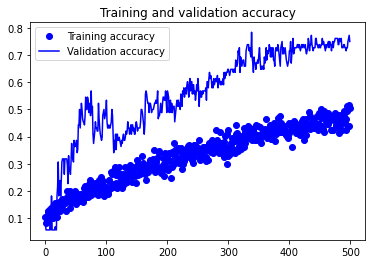

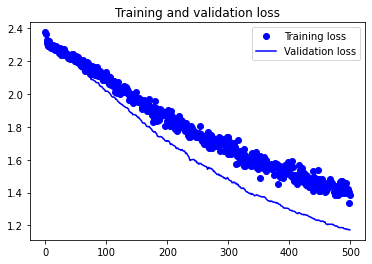

In [22]:
accuracy = insulin_units_train.history['accuracy']
val_accuracy = insulin_units_train.history['val_accuracy']
loss = insulin_units_train.history['loss']
val_loss = insulin_units_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
predicted_classes2 = insulin_units_model.predict(test_X)

4/4 [==============================] - 0s 11ms/step


In [24]:
predicted_classes=[]
for predicted_unit in predicted_classes2:
    predicted_classes.append(predicted_unit.tolist().index(max(predicted_unit)))
predicted_classes=np.array(predicted_classes)

# Aprendamos de los errores: Qué mejorar

Found 90 correct labels


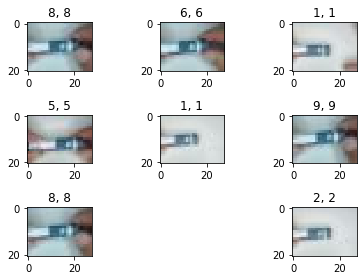

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(insulin_units_labels[predicted_classes[correct]],
                                                    insulin_units_labels[test_Y[correct]]))

    plt.tight_layout()

Found 20 incorrect labels


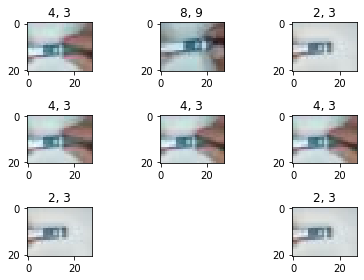

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(insulin_units_labels[predicted_classes[incorrect]],
                                                    insulin_units_labels[test_Y[incorrect]]))
    plt.tight_layout()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        15
     Class 1       1.00      0.60      0.75         5
     Class 2       0.62      1.00      0.77        10
     Class 3       0.00      0.00      0.00        12
     Class 4       0.55      0.85      0.67        13
     Class 5       1.00      1.00      1.00        10
     Class 6       0.76      1.00      0.87        13
     Class 7       1.00      0.78      0.88         9
     Class 8       0.91      1.00      0.95        10
     Class 9       1.00      0.85      0.92        13

    accuracy                           0.82       110
   macro avg       0.78      0.81      0.78       110
weighted avg       0.77      0.82      0.78       110



C:\Users\Ruben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruben\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Prediccion de una nueva imagen

In [64]:
from skimage.transform import resize

dirname = os.path.join(os.getcwd(), 'pictures_test')
filename = "picture_2_10.jpg"
filepath = os.path.join(dirname, filename)
filenames = [filepath] 



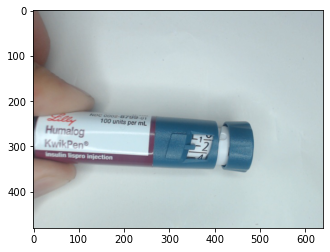

In [65]:
# plot new image
img = plt.imread(filepath)
imgplot = plt.imshow(img)

In [ ]:
# re-size image
for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

In [70]:
# re-size image to (21,28) and insulin unit prediction
images = []
for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)


X = np.array(images, dtype=np.uint8)
test_X = X.astype('float32')
test_X = test_X / 255.

# unit prediction
predicted_classes = insulin_units_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(f"FileName: {filename}, Insulin Unit Prediction: {insulin_units_labels[img_tagged.tolist().index(max(img_tagged))]}")
    
    

1/1 [==============================] - 0s 45ms/step
FileName: picture_2_10.jpg, Insulin Unit Prediction: 2
